In [1]:
# 在linux上面运行
import numpy as np
import cv2
import math
import matplotlib
import serial
import time
from Vision_Net import FastestDet
from matplotlib import pyplot as plt

# 获取并处理图像
def get_image(image):
    # 开全局变量处理,分理处红绿蓝
    global image_red, image_green, image_blue
    # 从摄像头获取图像
    image=image
    image_red=image[:,:,2].astype(np.float32)
    image_green=image[:,:,1].astype(np.float32)
    image_blue=image[:,:,0].astype(np.float32)
    #cv2.imshow('image',image)
    #cv2.waitKey(1)

# 突出图像中的红色目标
def get_red():
    global image, image_red, image_green, image_blue
    image_red_only=image_red*2-image_blue-image_green
    image_red_only[image_red_only<0]=0
    return image_red_only

# 突出图像中的绿色目标
def get_green():
    global image, image_red, image_green, image_blue
    image_green_only=image_green*2-image_blue-image_red
    image_green_only[image_green_only<0]=0
    return image_green_only

# 突出图像中的蓝色目标
def get_blue():
    global image, image_red, image_green, image_blue
    image_blue_only=image_blue*2-image_blue-image_red
    image_blue_only[image_blue_only<0]=0
    return image_blue_only

# 突出目标颜色
def find_aim_color(aim_color):
    if aim_color == '1':
        return get_red()
    if aim_color == '2':
        return get_green()
    if aim_color == '3':
        return get_blue()
    else:
        return get_blue()

# 展示图片
def show_image(image):
    image_show=image.astype(np.uint8)
    plt.imshow(image_show, cmap='gray')
    plt.axis('off')  # 不显示坐标轴
    plt.show()

# 在某一图像的指定位置添加图案
kernel = np.array([
[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
[0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
[0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0],
[0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
[0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
[0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0],
[0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
[0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
])*255
def draw_image(image_gray_to_draw, kernel_point):
    try:
        image_gray_to_draw[int(kernel_point[0]-11):int(kernel_point[0]+11),int(kernel_point[1]-11):int(kernel_point[1]+11)]=kernel
    except:
        pass
    return image_gray_to_draw

In [ ]:
photo=find_aim_color('G')
photo=(photo/np.max(photo))*255
show_image(photo)

In [5]:
from pyzbar import pyzbar
def decode_qr_code(QR_img):
    """
    识别二维码,对二维码进行编译,返回值
    :param code_img_path: 二维码的保存地址
    :return: 二维码的编译结果
    """
    return pyzbar.decode(QR_img, symbols=[pyzbar.ZBarSymbol.QRCODE])

In [ ]:
img=cv2.imread('C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\\213+231_phone.jpg')
results = decode_qr_code(img)
print("2、正在解码：")
if len(results):
    print("解码结果是：")
    print(results[0].data.decode("utf-8"))
else:
    print("无法识别")

In [ ]:
results=results[0].data.decode("utf-8")
QR1,QR2=results.split('+')
print(QR1,QR2)

In [ ]:
"""
生成二维码保存及对二维码解码输出
运行需要安装相应库
"""
import os
import qrcode
from PIL import Image
from pyzbar import pyzbar


def createQRCode1(content, save_path=None):
    """
    创建二维码图片,并保存
    :param content:二维码文本信息
    :param save_path:二维码保存地址
    :return:
    """

    qr = qrcode.QRCode(version=5, error_correction=qrcode.constants.ERROR_CORRECT_M, box_size=8, border=4)
    qr.add_data(data=content)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    if save_path:
        img.save(save_path)
    else:
        img.show()


def createQRCode2(content, icon_path, save_path=None):
    """
    创建带中心图片的二维码,并保存
    :param content: 二维码文本信息
    :param icon_path: 中心图片地址
    :param save_path: 二维码保存地址
    :return: 无返回值
    """

    # 判断中心图片是否存在
    if not os.path.exists(icon_path):
        raise FileExistsError(icon_path)

    # 创建二维码图片
    qr = qrcode.QRCode(version=5, error_correction=qrcode.constants.ERROR_CORRECT_H, box_size=8, border=4)
    qr.add_data(data=content)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white").convert('RGBA')

    # 调整二维码图片
    icon_img = Image.open(icon_path)
    code_width, code_height = img.size
    icon_img = icon_img.resize(
        (code_width // 4, code_height // 4), Image.ANTIALIAS)

    img.paste(icon_img, (code_width * 3 // 8, code_width * 3 // 8))

    if save_path:
        img.save(save_path)  # 保存二维码图片
        img.show()  # 显示二维码图片
    else:
        print("save error!")


def decode_qr_code(code_img_path):
    """
    识别二维码,对二维码进行编译,返回值
    :param code_img_path: 二维码的保存地址
    :return: 二维码的编译结果
    """
    if not os.path.exists(code_img_path):
        raise FileExistsError(code_img_path)

    return pyzbar.decode(Image.open(code_img_path), symbols=[pyzbar.ZBarSymbol.QRCODE])


if __name__ == "__main__":
    print("============QRcodetest===============")
    print("         1、Make a QRcode            ")
    print("         2、Scan a QRcode            ")
    print("=====================================")
    print("1、请输入二维码存储信息：")
    code_Data = input('>>:').strip()
    print("正在编码·······")

    # createQRCode2(code_Data, "img/QRcenter.jpg", "qrcode.png")  # 内容,center图片,生成二维码图片
    createQRCode1(code_Data, "qrcode.png")
    print("图片已保存,名称为：qrcode.png")
    results = decode_qr_code("qrcode.png")
    print("2、正在解码：")
    if len(results):
        print("解码结果是：")
        print(results[0].data.decode("utf-8"))
    else:
        print("无法识别")


In [ ]:
PBL='LWLQ1'
PBL[0:4]=='LWLQ'
i=2
str(i+1)

In [ ]:
import numpy as np  
  
# 假设你有以下坐标点  
x = np.array([1, 2, 3, 4, 5])  
y = np.array([2, 3, 5, 7, 11])  

xy=[(1,2),(2,3),(3,5),(4,7),(5,11)]

# 使用numpy的polyfit计算线性回归,1表示多项式的度数为1（即线性）  
coefficients = np.polyfit(x, y, 1)
  
# coefficients中的第一个元素是斜率,第二个元素是截距  
slope = coefficients[0]  
intercept = coefficients[1]  
  
print(f"斜率: {slope}, 截距: {intercept}")

In [ ]:
def order_deal(order_temp):
    order_temp=min(max(-999,order_temp),999)
    if order_temp>=0:
        error='+'+str(int(int(order_temp)%1000/100))+str(int(int(order_temp)%100/10))+str(int(order_temp)%10)
    if order_temp<0:
        error='-'+str(int(int((-order_temp))%1000/100))+str(int(int((-order_temp))%100/10))+str(int((-order_temp))%10)
    return error

X_CJQ,Y_CJQ,K_CJG=23,-13.1,-330
'K'+order_deal(K_CJG)+'X'+order_deal(X_CJQ)+'Y'+order_deal(Y_CJQ)

In [1]:
# 找到位置
def get_position():
    # 分别返回目标的行列
    position_XY=0,0
    print('get_position函数未完善')
    return position_XY

In [ ]:
# 判断在物料区当前视角中是否有是目标物料
def Judge_WLQ_material(aim_image,aim_color):
    print('Judge_WLQ_material函数未完善')
    return 0

In [25]:
# this part we need find the center of every circle
# import the image
get_image()

In [ ]:
get_image()
image_red1=get_red()
image_green1=get_green()
image_blue1=get_blue()
show_image(image_red1)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def nothing(x):  # 滑动条的回调函数
    pass
src = cv2.imread('C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo\\7.jpg')
srcBlur = cv2.GaussianBlur(src, (3, 3), 0)
gray = cv2.cvtColor(srcBlur, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
WindowName = 'Approx'  # 窗口名
cv2.namedWindow(WindowName, cv2.WINDOW_AUTOSIZE)  # 建立空窗口

cv2.createTrackbar('threshold', WindowName, 0, 100, nothing)  # 创建滑动条
cv2.createTrackbar('minLineLength', WindowName, 0, 100, nothing)  # 创建滑动条
cv2.createTrackbar('maxLineGap', WindowName, 0, 100, nothing)  # 创建滑动条

while(1):
    img = src.copy()
    threshold = cv2.getTrackbarPos('threshold', WindowName)  # 获取滑动条值
    minLineLength = 100 * cv2.getTrackbarPos('minLineLength', WindowName)  # 获取滑动条值
    maxLineGap = cv2.getTrackbarPos('maxLineGap', WindowName)  # 获取滑动条值
 
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength, maxLineGap)
 
    for line in lines:
        x1 = line[0][0]
        y1 = line[0][1]
        x2 = line[0][2]
        y2 = line[0][3]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
 
    cv2.imshow(WindowName, img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

[[[ 87.5 160.5  58.4]
  [518.5 157.5  68.5]
  [291.5 162.5  62.4]]]
58.4
68.5
62.4


c:\Users\SaLuo\anaconda3_STI\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SaLuo\anaconda3_STI\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SaLuo\anaconda3_STI\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38669 (\N{CJK UNIFIED IDEOGRAPH-970D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SaLuo\anaconda3_STI\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22827 (\N{CJK UNIFIED IDEOGRAPH-592B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SaLuo\anaconda3_STI\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22278 (\N{CJK UNIFIED IDEOGRAPH-5706}) missing from current font.
  fig.canvas

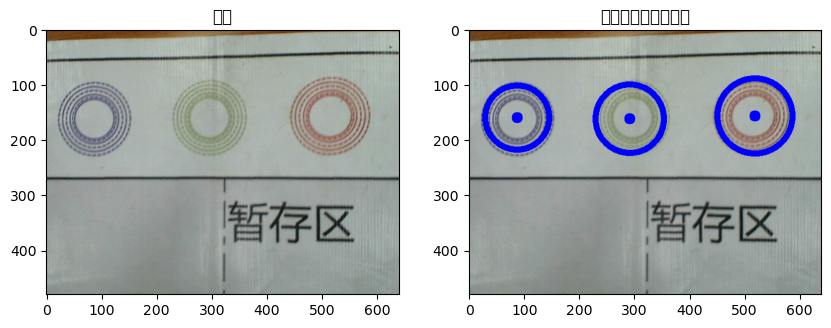

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo\\7.jpg')
img = src.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 进行中值滤波
# dst_img = cv2.medianBlur(img_gray, 7)
dst_img = img_gray

# 霍夫圆检测
circle = cv2.HoughCircles(dst_img, cv2.HOUGH_GRADIENT, 1, 150,
                         param1=100, param2=100, minRadius=0, maxRadius=10000)
print(circle)
# 将检测结果绘制在图像上
for i in circle[0, :]:  # 遍历矩阵的每一行的数据
    if (i[2] > 40)&(i[2] < 80):
        print(i[2])
        # 绘制圆形
        cv2.circle(img, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 10)
        # 绘制圆心
        cv2.circle(img, (int(i[0]), int(i[1])), 10, (255, 0, 0), -1)

# 显示图像
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=100)
axes[0].imshow(src[:, :, ::-1])
axes[0].set_title("原图")
axes[1].imshow(img[:, :, ::-1])
axes[1].set_title("霍夫圆检测后的图像")
plt.show()

In [ ]:
show_image(src)

[[[ 87.5 160.5  58.4]
  [518.5 157.5  68.5]
  [291.5 162.5  62.4]]]


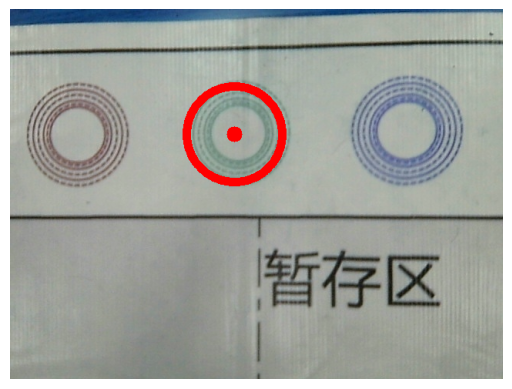

In [3]:
road='C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo/'
src = cv2.imread(road+'7.jpg')
get_image(src)
# 定义目标颜色
aim_color='2'
# 进行霍夫圆检测
_img1 = src.copy()
_img_gray1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2GRAY)
# 站在车的视角,从左到右依次为蓝,绿,红
circle_center=np.zeros((3,2))
# 进行中值滤波
_dst_img1 = _img_gray1
# 霍夫圆检测
circle = cv2.HoughCircles(_dst_img1, cv2.HOUGH_GRADIENT, 1, 150,
                         param1=100, param2=100, minRadius=0, maxRadius=10000)
print(circle)

# 此时获得的结果分别为圆心的x,y坐标和半径
circle_possible=np.zeros((3))
# 遍历所有圆心，找到对应颜色的圆心
for j in range(len(circle[0, :])):
    i=circle[0, j]
    if (i[2] > 40)&(i[2] < 80):
        # 在此处绘制正方形的长宽
        R=70
        top_left_corner=(int(i[0])-R, int(i[1])-R)
        bottom_right_corner=(int(i[0])+R, int(i[1])+R)
        # 提取目标颜色
        _color_only_temp=find_aim_color(aim_color)
        circle_possible[j]=np.sum(_color_only_temp[top_left_corner[1]:bottom_right_corner[1], top_left_corner[0]:bottom_right_corner[0]])
# 找到目标颜色的圆心
aim_circle=circle[0, np.argmax(circle_possible)]
# 绘制图像
cv2.circle(_img1, (int(aim_circle[0]), int(aim_circle[1])), int(aim_circle[2]), (255, 0, 0), 10)
cv2.circle(_img1, (int(aim_circle[0]), int(aim_circle[1])), 10, (255, 0, 0), -1)
show_image(_img1)

In [ ]:
# 判断在物料区当前视角中是否有是目标物料
def Judge_WLQ_material(aim_image,aim_color):
    print('Judge_WLQ_material函数未完善')
    return 0

In [17]:

# 在目标图像中寻找圆并找出圆心
def Hough_Circle_get():
    _img1 = image.copy()
    _img_gray1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2GRAY)                        
    circle_center=np.zeros((3,2))
    # 进行中值滤波(这里我们略去)
    _dst_img1 = _img_gray1
    # 霍夫圆检测
    circle = cv2.HoughCircles(_dst_img1, cv2.HOUGH_GRADIENT, 1, 150,param1=100, param2=100, minRadius=0, maxRadius=10000)
    print(':'+str(circle))
    return circle

# 此时获得的结果分别为圆心的x,y坐标和半径
def get_aim_circle(circles,aim_color):
    circle_possible=np.zeros((3))
    # 遍历所有圆心，找到对应颜色的圆心
    for j in range(len(circles[0, :])):
        i=circles[0, j]
        if (i[2] > 40)&(i[2] < 80):
            # 在此处绘制正方形的长宽
            R=70
            top_left_corner=(int(i[0])-R, int(i[1])-R)
            bottom_right_corner=(int(i[0])+R, int(i[1])+R)
            # 提取目标颜色
            _color_only_temp=find_aim_color(aim_color)
            circle_possible[j]=np.sum(_color_only_temp[top_left_corner[1]:bottom_right_corner[1], top_left_corner[0]:bottom_right_corner[0]])
    # 找到目标颜色的圆心
    aim_circle=circles[0, np.argmax(circle_possible)]  
    return aim_circle

In [ ]:
# Judge_WLQ_material(find_aim_color(aim_color),aim_color)
road='C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo/'
global image
src = cv2.imread(road+'77.jpg')
image=src
get_image(src)
# 突出目标颜色
# 站在车的视角,从左到右依次为蓝,绿,红
# 进行霍夫圆检测
_circle_now=Hough_Circle_get()
# 获取目标圆心
circle=get_aim_circle(_circle_now,aim_color)

# 遍历所有圆心，找到对应颜色的圆心
for i in circle[0, :]:  # 遍历矩阵的每一行的数据
    if (i[2] > 40)&(i[2] < 80):
        # 在此处绘制正方形的长宽
        R=70
        top_left_corner=(int(i[0])-R, int(i[1])-R)
        bottom_right_corner=(int(i[0])+R, int(i[1])+R)
        cv2.rectangle(img, top_left_corner, bottom_right_corner, (0, 255, 0), 2)
        print(np.sum(red1[top_left_corner[1]:bottom_right_corner[1], top_left_corner[0]:bottom_right_corner[0]]))
        if np.sum(red1[top_left_corner[1]:bottom_right_corner[1], top_left_corner[0]:bottom_right_corner[0]])>100:
            # 绘制圆形
            cv2.circle(img, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 10)
            # 绘制圆心
            cv2.circle(img, (int(i[0]), int(i[1])), 10, (255, 0, 0), -1)
        else:
            print("未找到红色目标")

In [ ]:
# 接下来突出图像中的红色目标
get_image()
red1=find_aim_color('2')
show_image(red1)
img = src.copy()
# 定义正方形的左上角和右下角坐标  
top_left_corner = (100, 100)  # (x, y)  
bottom_right_corner = (300, 300)  # (x + width, y + height)  

# 遍历所有圆心，找到对应颜色的圆心
for i in circle[0, :]:  # 遍历矩阵的每一行的数据
    if (i[2] > 40)&(i[2] < 80):
        # 在此处绘制正方形的长宽
        R=70
        top_left_corner=(int(i[0])-R, int(i[1])-R)
        bottom_right_corner=(int(i[0])+R, int(i[1])+R)
        cv2.rectangle(img, top_left_corner, bottom_right_corner, (0, 255, 0), 2)
        print(np.sum(red1[top_left_corner[1]:bottom_right_corner[1], top_left_corner[0]:bottom_right_corner[0]]))
        if np.sum(red1[top_left_corner[1]:bottom_right_corner[1], top_left_corner[0]:bottom_right_corner[0]])>100:
            # 绘制圆形
            cv2.circle(img, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 10)
            # 绘制圆心
            cv2.circle(img, (int(i[0]), int(i[1])), 10, (255, 0, 0), -1)
        else:
            print("未找到红色目标")

# 显示图像
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=100)
axes[0].imshow(src[:, :, ::-1])
axes[0].set_title("原图")
axes[1].imshow(img[:, :, ::-1])
axes[1].set_title("霍夫圆检测后的图像")
plt.show()

In [ ]:
def nothing(x):  # 滑动条的回调函数
    pass

road='C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo/'
global image
src = cv2.imread(road+'175.jpg')

# 进行霍夫圆检测
_img1 = src.copy()
_img_gray1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2GRAY)
# 进行中值滤波
_dst_img1 = _img_gray1

srcBlur = cv2.GaussianBlur(src, (3, 3), 0)
gray = cv2.cvtColor(srcBlur, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
WindowName = 'Approx'  # 窗口名
cv2.namedWindow(WindowName, cv2.WINDOW_AUTOSIZE)  # 建立空窗口

cv2.createTrackbar('dp', WindowName, 1, 300, nothing)  # 创建滑动条
cv2.createTrackbar('minDist', WindowName, 1, 300, nothing)  # 创建滑动条
cv2.createTrackbar('param1', WindowName, 1, 300, nothing)  # 创建滑动条
cv2.createTrackbar('param2', WindowName, 1, 300, nothing)  # 创建滑动条

while(1):
    img = src.copy()
    dp = cv2.getTrackbarPos('dp', WindowName)  # 获取滑动条值
    minDist = cv2.getTrackbarPos('minDist', WindowName)  # 获取滑动条值
    param1 = cv2.getTrackbarPos('param1', WindowName)  # 获取滑动条值
    param2 = cv2.getTrackbarPos('param2', WindowName)  # 获取滑动条值

    # 霍夫圆检测
    circle = cv2.HoughCircles(_dst_img1, cv2.HOUGH_GRADIENT, dp, minDist,
                         param1, param2, minRadius=0, maxRadius=10000)
    try:
        # 遍历所有圆心，找到对应颜色的圆心
        for i in circle[0, :]:  # 遍历矩阵的每一行的数据
            cv2.circle(img, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 10)
            # 绘制圆心
            cv2.circle(img, (int(i[0]), int(i[1])), 10, (255, 0, 0), -1)  
    except:
        pass
    cv2.imshow(WindowName, img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

In [ ]:
road='C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo/'
src = cv2.imread(road+'175.jpg')
get_image(src)
# 定义目标颜色
aim_color='2'
# 进行霍夫圆检测
_img1 = src.copy()
_img_gray1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2GRAY)
# 站在车的视角,从左到右依次为蓝,绿,红
circle_center=np.zeros((3,2))
# 进行中值滤波
_dst_img1 = _img_gray1
# 霍夫圆检测
circle = cv2.HoughCircles(_dst_img1, cv2.HOUGH_GRADIENT, 1, 150,param1=100, param2=100, minRadius=0, maxRadius=10000)
print(circle)

# 此时获得的结果分别为圆心的x,y坐标和半径
circle_possible=np.zeros((3))
# 遍历所有圆心，找到对应颜色的圆心
for j in range(len(circle[0, :])):
    i=circle[0, j]
    if (i[2] > 40)&(i[2] < 80):
        # 在此处绘制正方形的长宽
        R=70
        top_left_corner=(int(i[0])-R, int(i[1])-R)
        bottom_right_corner=(int(i[0])+R, int(i[1])+R)
        # 提取目标颜色
        _color_only_temp=find_aim_color(aim_color)
        circle_possible[j]=np.sum(_color_only_temp[top_left_corner[1]:bottom_right_corner[1], top_left_corner[0]:bottom_right_corner[0]])
# 找到目标颜色的圆心
aim_circle=circle[0, np.argmax(circle_possible)]
# 绘制图像
cv2.circle(_img1, (int(aim_circle[0]), int(aim_circle[1])), int(aim_circle[2]), (255, 0, 0), 10)
cv2.circle(_img1, (int(aim_circle[0]), int(aim_circle[1])), 10, (255, 0, 0), -1)
show_image(_img1)

In [ ]:
# 判断在物料区当前视角中是否有是目标物料
def Judge_WLQ_material(aim_image,aim_color):
    print('Judge_WLQ_material函数未完善')
    return 0

road='C:\Parallel_World\BaiduSyncdisk\My_World\Software_World\Python\Raspberry_Pi\Create_Race\Photo/'
src = cv2.imread(road+'80.jpg')

_img1 = src.copy()

get_image(src)
_photo_now=find_aim_color('2')

top_left_corner=(240,400)
bottom_right_corner=(400, 240)
cv2.rectangle(_img1, top_left_corner, bottom_right_corner, (0, 255, 0), 2)

_right_color=np.sum(_photo_now[240:400,240:400])
print(_right_color>900000)
print(_right_color)
show_image(_img1)

In [ ]:
circle_center=np.zeros((3,2))
i=0
circle_center[i,0],circle_center[i,1]=

In [4]:
np.arctan(1)

0.7853981633974483